In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pingouin
from scipy.stats import t
from statsmodels.graphics.gofplots import qqplot
from scipy.stats.distributions import norm

In [9]:
# Load the data frames into csvs and parse the date column into a datetime type in order to perform manipulation
women_all = pd.read_csv('women_results.csv', parse_dates=['date'])
men_all = pd.read_csv('men_results.csv',  parse_dates=['date'])




In [16]:
# Exploratory analysis

# The women dataframe
print(women_all.info())
print(women_all.head(10))
print(women_all.isna().sum())
print(women_all['tournament'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object        
 4   home_score  4884 non-null   int64         
 5   away_score  4884 non-null   int64         
 6   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 267.2+ KB
None
   Unnamed: 0       date    home_team    away_team  home_score  away_score  \
0           0 1969-11-01        Italy       France           1           0   
1           1 1969-11-01      Denmark      England           4           3   
2           2 1969-11-02      England       France           2           0   
3           3 1969-11-02        Italy      Denmark           3           1

In [17]:
# The men dataframe
print(men_all.info())
print(men_all.head(10))
print(men_all.isna().sum())
print(men_all['tournament'].value_counts())

# Check the date column for the format and sorting
print(men_all['date'].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB
None
   Unnamed: 0       date home_team away_team  home_score  away_score  \
0           0 1872-11-30  Scotland   England           0           0   
1           1 1873-03-08   England  Scotland           4           2   
2           2 1874-03-07  Scotland   England           2           1   
3           3 1875-03-06   England  Scotland           2           2   
4           4 1876-03-04  

In [18]:
# Create a function to subset the women and men data frames starting in Jan 01 2002 and with FIFA World Cup in the tournament column

def subset (df):
    filtered_df = df[(df['date'] >= '2002-01-01') & (df['tournament'] == 'FIFA World Cup')].copy()
    filtered_df['total_score'] = df['home_score'] + df['away_score']
    return filtered_df


In [14]:
# Subset the dataframes with the subset function

women_2002 = subset(women_all)
print(women_2002.head(10))

men_2002 = subset(men_all)
print(men_2002.head(10))

      Unnamed: 0       date      home_team    away_team  home_score  \
1600        1600 2003-09-20        Nigeria  North Korea           0   
1601        1601 2003-09-20         Norway       France           2   
1602        1602 2003-09-20        Germany       Canada           4   
1603        1603 2003-09-20          Japan    Argentina           6   
1604        1604 2003-09-21  United States       Sweden           3   
1605        1605 2003-09-21         Brazil  South Korea           3   
1606        1606 2003-09-21      Australia       Russia           1   
1607        1607 2003-09-21       China PR        Ghana           1   
1609        1609 2003-09-24         Norway       Brazil           1   
1610        1610 2003-09-24         France  South Korea           1   

      away_score      tournament  total_score  
1600           3  FIFA World Cup            3  
1601           0  FIFA World Cup            2  
1602           1  FIFA World Cup            5  
1603           0  FIFA Wor

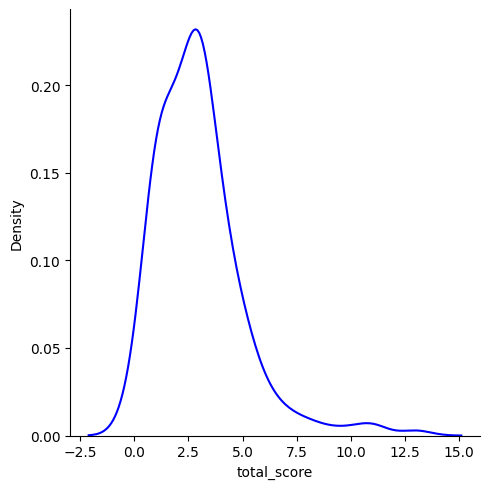

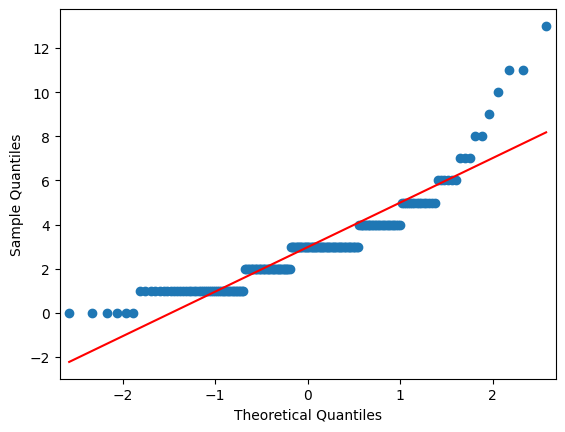

200


In [23]:
# Determine which test statistic to conduct

# Check the total_score distribution and sample size

sns.displot(data = women_2002, x='total_score', kind='kde',color='blue')
qqplot(women_2002['total_score'], line='s',dist = norm)
plt.show()

# sample size
print(len(women_2002))

# The total score in not normally distributed

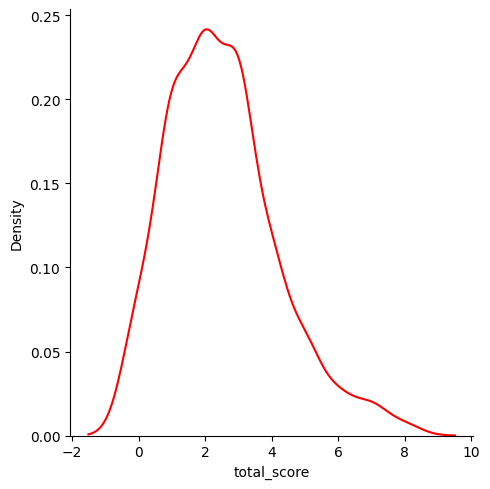

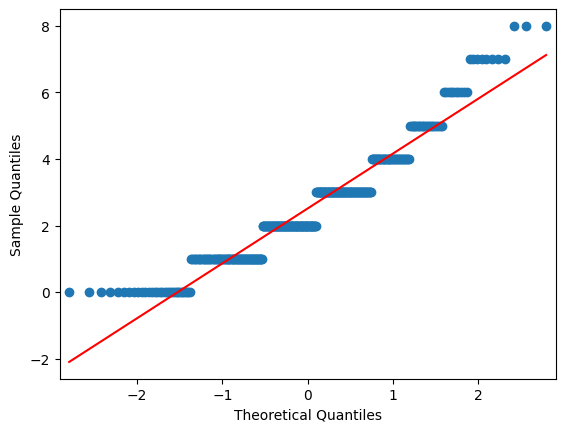

384


In [24]:
sns.displot(data = men_2002, x = 'total_score', kind='kde', color = 'red')
qqplot(men_2002['total_score'], line='s',dist = norm)
plt.show()

print(len(men_2002))

# The total score is not normally distributed

In [25]:
# Conduct MWU test due to the values distribution

# Add gender marker to the sample in order to distinguish when aggregating a pivot table
women_2002['gender'] = 'f' 
men_2002['gender'] = 'm'

# Concat the 2 dataframes
test_df = pd.concat([women_2002, men_2002], ignore_index=True)

# Create a pivot table for the MWU testing
gender_vs_goals = test_df[['total_score','gender']]
gender_vs_goals_wide = gender_vs_goals.pivot(columns = 'gender',values = 'total_score')

# Conduct the MWU test statistics
test=pingouin.mwu(x= gender_vs_goals_wide['f'], y= gender_vs_goals_wide['m'], alternative = 'greater' )
print(test)

# Answer the question
p_val = test.iloc[0,2]
result_dict = {"p_val":p_val, "result":"reject"} # reject the null hypothesis because the women score is higher the men's one



       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107  0.126901  0.563451
